In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('laptop_data.csv')

In [4]:
df.sample()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1067,1067,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.62kg,42517.9728


In [5]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
332,332,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2kg,71075.5200
401,401,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.9kg,81465.1200
1295,1295,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
78,78,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,28238.4000
626,626,Mediacom,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics,Windows 10,1.4kg,12733.9200


In [6]:
df.shape

(1303, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Data Preprocessing

In [10]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [12]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [14]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df['Price'] = df['Price'].astype('int32')

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [16]:
str='intel core i5 4500hz'
str1=str[0:13]
str2=str[-6::]
print(str1)
print(str2)

intel core i5
4500hz


In [17]:
CPU=[]
Processor=[]
for str in df['Cpu']:
    str1=str[0:13]
    str2=str[-6::]
    CPU.append(str1)
    Processor.append(str2)

In [18]:
df.insert(4,"CPU",CPU)

In [19]:
df.insert(5,"Clock Speed",Processor)

In [20]:
df.drop(columns=['Cpu'],inplace=True)

In [21]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,CPU,Clock Speed,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095


In [22]:
def fetch_processor(text):
    if text =='Intel Core i7' or text =='Intel Core i5' or text =='Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [23]:
df['CPU_Brand'] = df['CPU'].apply(fetch_processor)

In [24]:
df['CPU_Brand'].value_counts()

CPU_Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

In [25]:
df.drop(columns=['CPU','Clock Speed'],inplace=True)

In [26]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU_Brand
1161,MSI,Gaming,14.0,Full HD 1920x1080,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,1.70,94252,Intel Core i7
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,122490,Intel Core i7
1232,Dell,Notebook,15.6,Touchscreen 1366x768,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24988,Intel Core i3
1269,Asus,Notebook,15.6,1366x768,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378,Intel Core i7
462,Asus,Notebook,15.6,Full HD 1920x1080,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,39906,Intel Core i5


In [27]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [28]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [29]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU_Brand,Touchscreen
950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,8,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.00,119826,Intel Core i7,0
180,Dell,Notebook,15.6,Full HD 1920x1080,16,256GB SSD + 2TB HDD,AMD Radeon 530,Linux,2.02,55890,Intel Core i7,0
801,Asus,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.37,58554,Intel Core i5,0
255,Dell,Ultrabook,13.3,Full HD 1920x1080,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.41,50562,Intel Core i5,0
189,Dell,Notebook,17.3,Full HD 1920x1080,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,57808,Intel Core i7,0


In [30]:
 df['IPS_Pannel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,Intel Core i5,0,1
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,Intel Core i5,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,Intel Core i5,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,Intel Core i7,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,Intel Core i5,0,1


In [32]:
y_resolution=[]
x_resolution=[]
for i in df['ScreenResolution'].str.split('x'):
    y_resolution.append(i[1])
    x_resolution.append(i[0][-4:])

In [33]:
df.insert(4,'x_resolution',x_resolution)
df.insert(5,'y_resolution',y_resolution)

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,x_resolution,y_resolution,Ram,Memory,Gpu,OpSys,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560,1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,Intel Core i5,0,1
1,Apple,Ultrabook,13.3,1440x900,1440,900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,Intel Core i5,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,1920,1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,Intel Core i5,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2880,1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,Intel Core i7,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560,1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,Intel Core i5,0,1


In [35]:
df['x_resolution'] = df['x_resolution'].astype('int32')
df['y_resolution'] = df['y_resolution'].astype('int32')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   x_resolution      1303 non-null   int32  
 5   y_resolution      1303 non-null   int32  
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   int32  
 12  CPU_Brand         1303 non-null   object 
 13  Touchscreen       1303 non-null   int64  
 14  IPS_Pannel        1303 non-null   int64  
dtypes: float32(1), float64(1), int32(4), int64(2), object(7)
memory usage: 127.4+ KB


In [37]:
df.corr(numeric_only=True)['Price']

Inches          0.068196
x_resolution    0.556529
y_resolution    0.552809
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS_Pannel      0.252207
Name: Price, dtype: float64

In [38]:
df['PPI'] = (((df['x_resolution']**2) + (df['y_resolution']**2))**0.5/df['Inches']).astype('float')

In [39]:
df.corr(numeric_only=True)['Price']

Inches          0.068196
x_resolution    0.556529
y_resolution    0.552809
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS_Pannel      0.252207
PPI             0.473487
Name: Price, dtype: float64

In [40]:
df.drop(columns=['ScreenResolution','x_resolution','y_resolution'],inplace=True)

In [41]:
df.drop(columns=['Inches'],inplace=True)

In [42]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel,PPI
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,Intel Core i5,0,1,226.983005
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,Intel Core i5,0,0,127.677940
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,Intel Core i5,0,0,141.211998
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,Intel Core i7,0,1,220.534624
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,Intel Core i5,0,1,226.983005


In [43]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [44]:
SSD1 = []
HDD1 = []
Flash_Storage1 = []
Hybrid1 = []

first = []
second = []

for x in df['Memory']:
    first.append(x.split('+')[0])
    if(x.find('+')!=-1):
        second.append(x.split('+')[1])
    else:
        second.append(0)
        
df['first'] = first
df['second'] = second

def append_zero(a,b,c):
    a.append(0)
    b.append(0)
    c.append(0)

for x in df['first']:
    a = x.split(' ')[0]
    if(x.split(' ')[1]=='SSD'):
        SSD1.append(a)
        append_zero(HDD1,Flash_Storage1,Hybrid1)
    elif(x.split(' ')[1]=='HDD'):
        HDD1.append(a)
        append_zero(SSD1,Flash_Storage1,Hybrid1)
    elif(x.split(' ')[1]=='Hybrid'):
        Hybrid1.append(a)
        append_zero(HDD1,SSD1,Flash_Storage1)
    else:
        Flash_Storage1.append(a)
        append_zero(HDD1,SSD1,Hybrid1)

SSD2 = []
HDD2 = []
Flash_Storage2 = []
Hybrid2 = []

for x in df['second']:
    a=0
    if(x==0):
        Hybrid2.append(a)
        append_zero(HDD2,SSD2,Flash_Storage2)
    else:
        a = x.split(' ')[2]
        if(x.split(' ')[3]=='SSD'):
            SSD2.append(a)
            append_zero(HDD2,Flash_Storage2,Hybrid2)
        elif(x.split(' ')[3]=='HDD'):
            HDD2.append(a)
            append_zero(SSD2,Flash_Storage2,Hybrid2)
        elif(x.split(' ')[3]=='Hybrid'):
            Hybrid2.append(a)
            append_zero(HDD2,SSD2,Flash_Storage2)
        else:
            Flash_Storage2.append(a)
            append_zero(HDD2,SSD2,Hybrid2)
    

SSD = []
HDD = []
Flash_Storage = []
Hybrid = []

def insert(a,b):
    c = []
    for x in range(0,1303,1):
        if(a[x]==0):
            c.append(b[x])
        else:
            c.append(a[x])
    return c

SSD = insert(SSD1,SSD2)
HDD = insert(HDD1,HDD2)
Flash_Storage = insert(Flash_Storage1,Flash_Storage2)
Hybrid = insert(Hybrid1,Hybrid2)

def replace_(a):
    temp=[]
    for x in a:
        if(x!=0):
            if('GB' in x):
                temp.append(x.replace('GB',' '))
            elif('.0TB' in x):
                temp.append(x.replace('.0TB','000'))
            else:
                temp.append(x.replace('TB','000'))
        else:
            temp.append(0)
    return temp

SSD=replace_(SSD)
HDD=replace_(HDD)
Flash_Storage=replace_(Flash_Storage)
Hybrid=replace_(Hybrid)

df['SSD'] = SSD
df['HDD'] = HDD
df['Flash_Storage'] = Flash_Storage
df['Hybrid'] = Hybrid

df.drop(columns=['first','second','Memory'],inplace=True)

In [45]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel,PPI,SSD,HDD,Flash_Storage,Hybrid
82,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.63,45820,Intel Core i5,0,0,157.350512,256,0,0,0
1026,HP,Notebook,4,Intel HD Graphics 620,Windows 10,2.31,63349,Intel Core i5,0,0,111.935204,0,500,0,0
1189,Acer,Gaming,16,Nvidia GeForce GTX 1070,Windows 10,4.20,138474,Intel Core i7,0,1,127.335675,256,1000,0,0
1224,Dell,2 in 1 Convertible,4,Intel HD Graphics 620,Windows 10,2.08,27119,Intel Core i3,1,0,146.860478,0,500,0,0
1108,HP,Notebook,4,AMD Radeon R4,Windows 10,2.10,21205,AMD Processor,0,0,141.211998,0,1000,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Gpu            1303 non-null   object 
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float32
 6   Price          1303 non-null   int32  
 7   CPU_Brand      1303 non-null   object 
 8   Touchscreen    1303 non-null   int64  
 9   IPS_Pannel     1303 non-null   int64  
 10  PPI            1303 non-null   float64
 11  SSD            1303 non-null   object 
 12  HDD            1303 non-null   object 
 13  Flash_Storage  1303 non-null   object 
 14  Hybrid         1303 non-null   object 
dtypes: float32(1), float64(1), int32(2), int64(2), object(9)
memory usage: 137.6+ KB


In [47]:
df['SSD'] = df['SSD'].astype('int32')
df['HDD'] = df['HDD'].astype('int32')
df['Flash_Storage'] = df['Flash_Storage'].astype('int32')
df['Hybrid'] = df['Hybrid'].astype('int32')

In [48]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS_Pannel       0.252207
PPI              0.473487
SSD              0.676202
HDD             -0.095672
Flash_Storage   -0.040511
Hybrid           0.007989
Name: Price, dtype: float64

In [49]:
df.drop(columns=['Flash_Storage','Hybrid'],inplace=True)

In [50]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel,PPI,SSD,HDD
140,Acer,Notebook,4,Nvidia GeForce MX130,Windows 10,3.0,34898,Intel Core i3,0,1,127.335675,0,1000
998,Asus,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5,95850,Intel Core i7,0,0,141.211998,256,1000
74,Acer,Notebook,8,Intel HD Graphics 520,Windows 10,2.1,20725,Intel Core i3,0,0,111.935204,0,1000
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.1,21312,AMD Processor,0,0,100.454670,0,500
579,Dell,Notebook,8,AMD Radeon R5 M430,Linux,2.2,39907,Intel Core i7,0,0,141.211998,256,0


In [51]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [52]:
GPU_Brand = []
for x in df['Gpu']:
    GPU_Brand.append(x.split(' ')[0])
df['GPU_Brand'] = GPU_Brand

In [53]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel,PPI,SSD,HDD,GPU_Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,Intel Core i5,0,1,226.983005,128,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,Intel Core i5,0,0,127.677940,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,Intel Core i5,0,0,141.211998,256,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,Intel Core i7,0,1,220.534624,512,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,Intel Core i5,0,1,226.983005,256,0,Intel


In [54]:
df['GPU_Brand'].value_counts()

GPU_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [55]:
df = df[df['GPU_Brand'] != 'ARM']

In [56]:
df['GPU_Brand'].value_counts()

GPU_Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [57]:
df.drop(columns=['Gpu'],inplace=True)

In [58]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel,PPI,SSD,HDD,GPU_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378,Intel Core i5,0,1,226.983005,128,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,Intel Core i5,0,0,127.677940,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,Intel Core i5,0,0,141.211998,256,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,Intel Core i7,0,1,220.534624,512,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095,Intel Core i5,0,1,226.983005,256,0,Intel


In [59]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [60]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    
df['OS'] = df['OpSys'].apply(cat_os)

In [61]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel,PPI,SSD,HDD,GPU_Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378,Intel Core i5,0,1,226.983005,128,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895,Intel Core i5,0,0,127.677940,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636,Intel Core i5,0,0,141.211998,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195,Intel Core i7,0,1,220.534624,512,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095,Intel Core i5,0,1,226.983005,256,0,Intel,Mac


In [62]:
df.drop(columns=['OpSys'],inplace=True)

In [63]:
df.head()

,Company,TypeName,Ram,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel,PPI,SSD,HDD,GPU_Brand,OS
0,Apple,Ultrabook,8,1.37,71378,Intel Core i5,0,1,226.983005,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,Intel Core i5,0,0,127.677940,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,Intel Core i5,0,0,141.211998,256,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,Intel Core i7,0,1,220.534624,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,Intel Core i5,0,1,226.983005,256,0,Intel,Mac


## Performing EDA

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\manvi\AppData\Local\Temp\ipykernel_16420\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

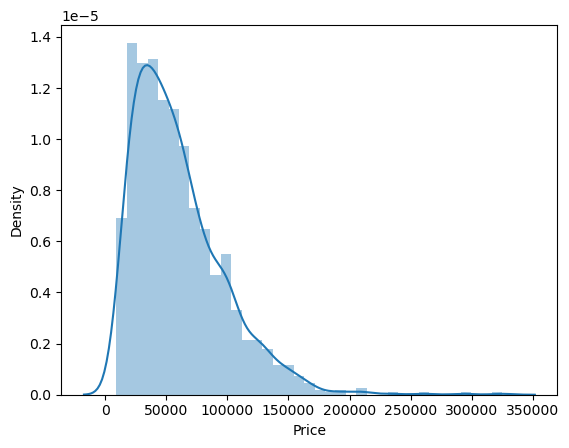

In [65]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

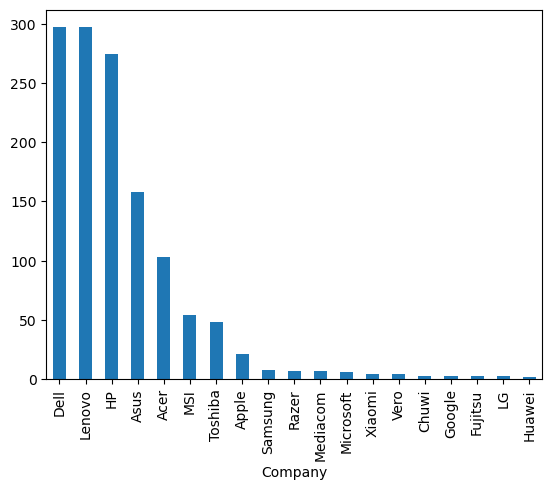

In [66]:
df['Company'].value_counts().plot(kind='bar')

In [67]:
df['Price'].groupby(df['Company']).mean().astype('int32').sort_values(ascending=False)

Company
Razer        178281
LG           111834
MSI           92115
Google        89385
Microsoft     85903
Apple         83340
Samsung       80332
Huawei        75870
Toshiba       67548
Dell          63193
Xiaomi        60390
Asus          58829
Lenovo        57882
HP            56890
Fujitsu       38840
Acer          33394
Chuwi         16745
Mediacom      15717
Vero          11583
Name: Price, dtype: int32

<Axes: xlabel='Price', ylabel='Company'>

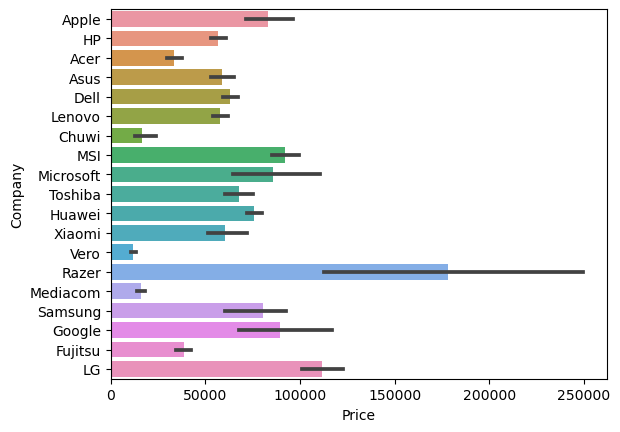

In [68]:
sns.barplot(x='Price',y='Company',data=df)

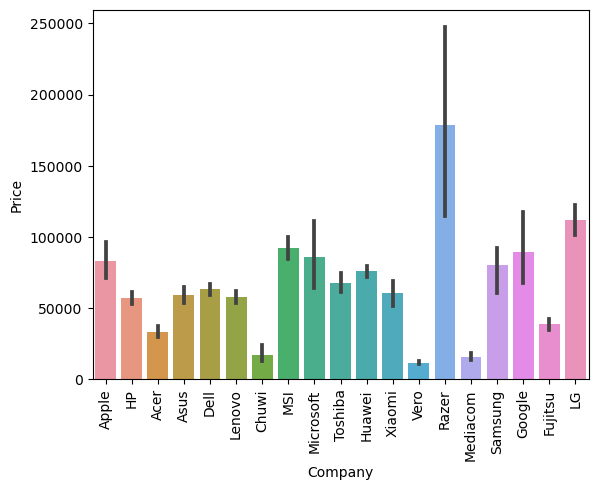

In [69]:
sns.barplot(x='Company',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

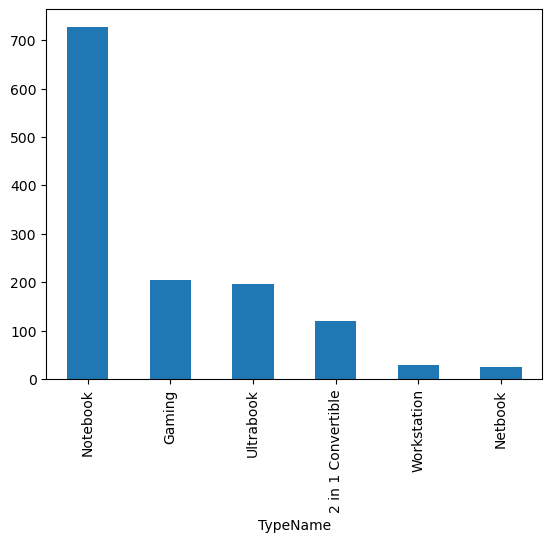

In [70]:
df['TypeName'].value_counts().plot(kind='bar')

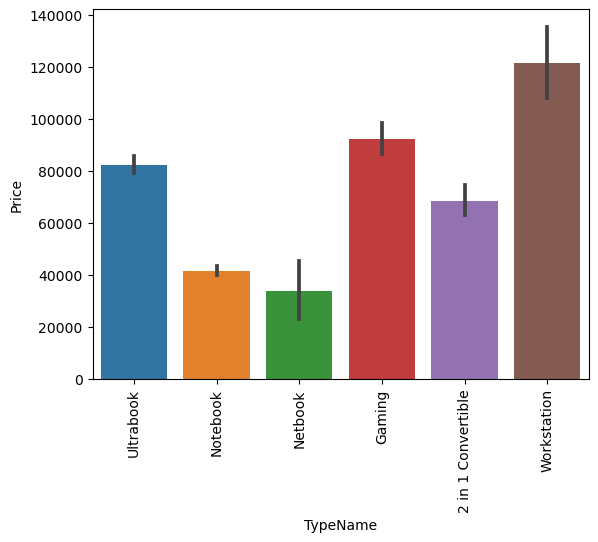

In [71]:
sns.barplot(x='TypeName',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Touchscreen'>

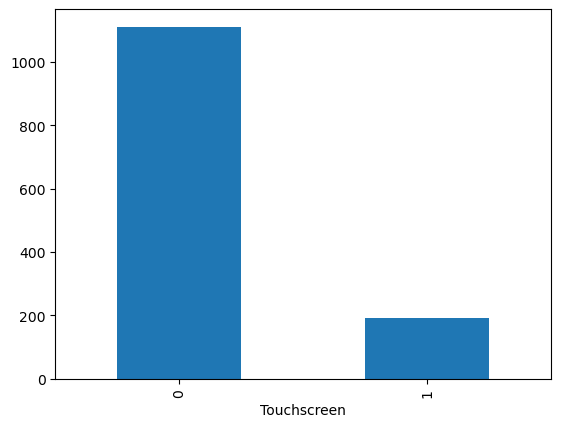

In [72]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

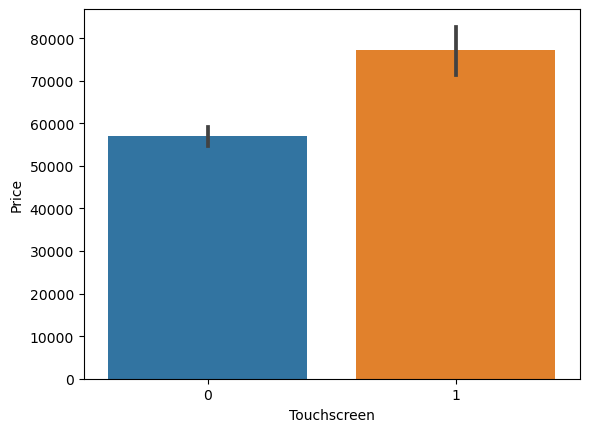

In [73]:
sns.barplot(x='Touchscreen',y='Price',data=df)

<Axes: xlabel='IPS_Pannel', ylabel='Price'>

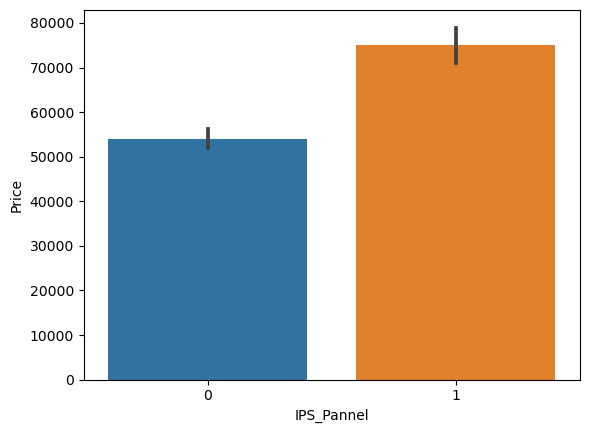

In [74]:
sns.barplot(x='IPS_Pannel',y='Price',data=df)

<Axes: xlabel='CPU_Brand'>

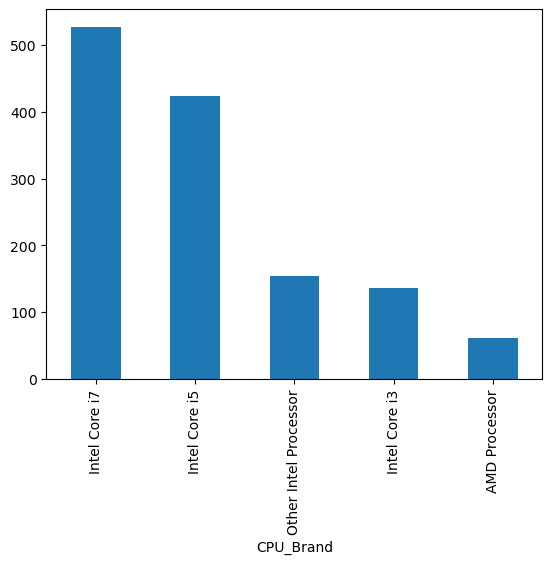

In [75]:
df['CPU_Brand'].value_counts().plot(kind='bar')

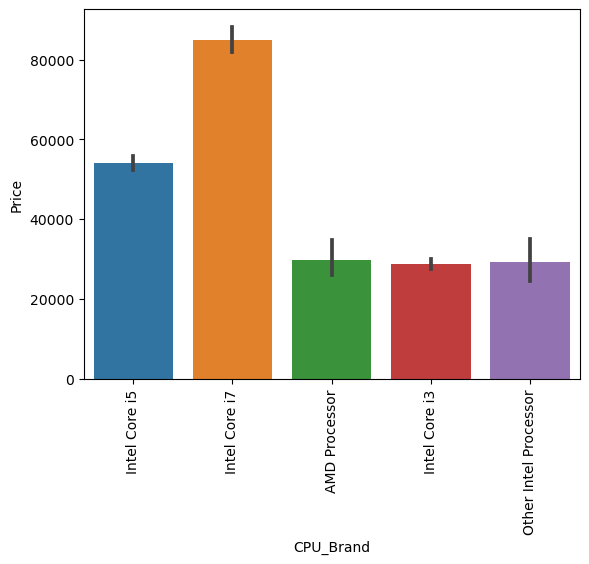

In [76]:
sns.barplot(x='CPU_Brand',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Ram'>

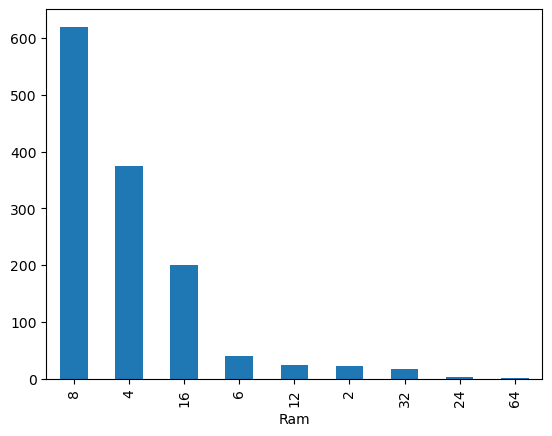

In [77]:
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

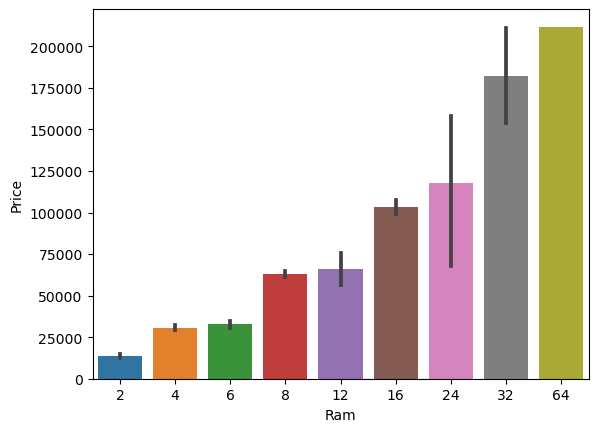

In [78]:
sns.barplot(x='Ram',y='Price',data=df)

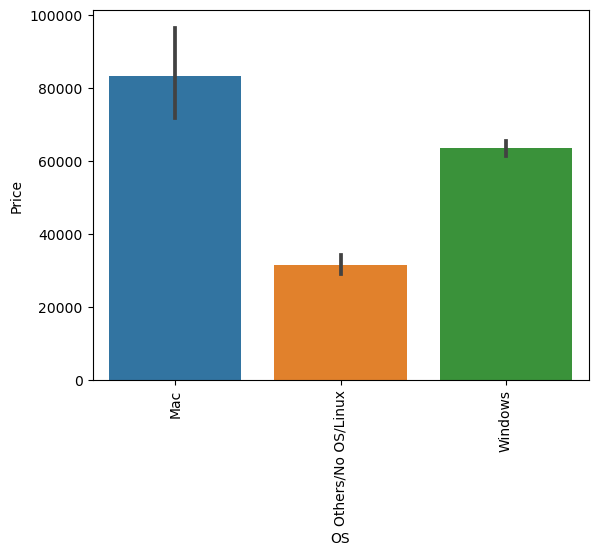

In [79]:
sns.barplot(x='OS',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\manvi\AppData\Local\Temp\ipykernel_16420\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

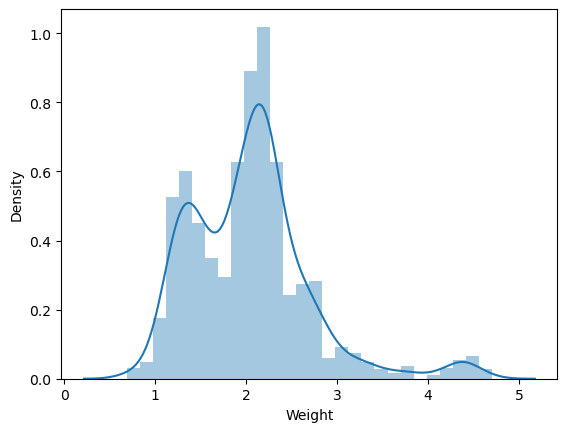

In [80]:
sns.distplot(df['Weight'])

<Axes: >

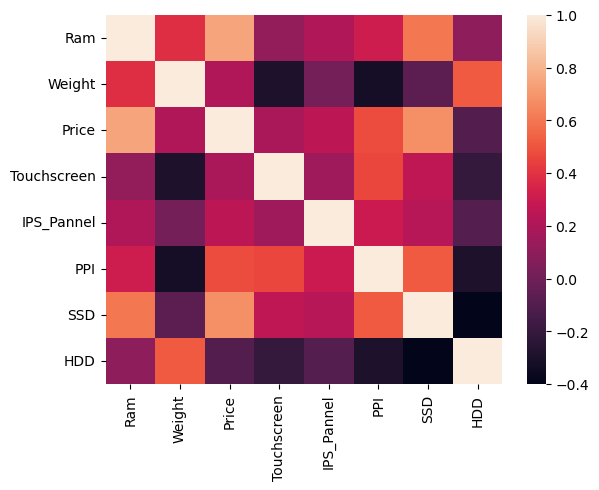

In [81]:
sns.heatmap(df.corr(numeric_only=True))

C:\Users\manvi\AppData\Local\Temp\ipykernel_16420\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

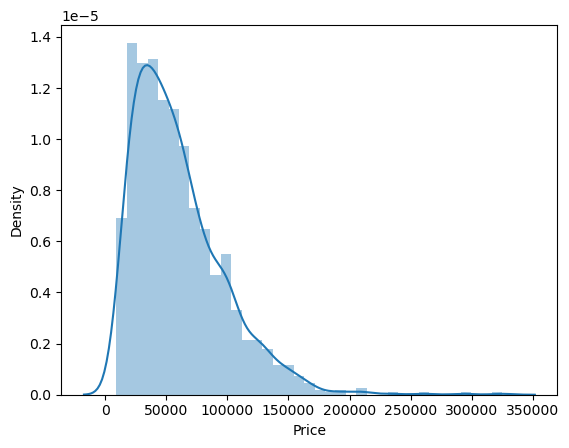

In [82]:
sns.distplot(df['Price'])

As Price column is right skewed so we have to apply log transform

## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [86]:
x_train.head()

,Company,TypeName,Ram,Weight,CPU_Brand,Touchscreen,IPS_Pannel,PPI,SSD,HDD,GPU_Brand,OS
147,Asus,Notebook,4,2.00,Other Intel Processor,0,0,141.211998,0,1000,Intel,Windows
342,HP,Notebook,8,2.10,Intel Core i3,0,1,141.211998,0,1000,Nvidia,Windows
1003,HP,Notebook,4,1.64,Intel Core i5,0,0,111.935204,0,500,Intel,Windows
814,Dell,Notebook,8,2.18,Intel Core i5,0,0,141.211998,256,0,AMD,Windows
344,Dell,Ultrabook,8,1.20,Intel Core i7,0,0,165.632118,256,0,Intel,Windows


## Applying Column Transformer and making Pipeline 

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [88]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,CPU_Brand,Touchscreen,IPS_Pannel,PPI,SSD,HDD,GPU_Brand,OS
0,Apple,Ultrabook,8,1.37,71378,Intel Core i5,0,1,226.983005,128,0,Intel,Mac


In [94]:
x_train.head()

,Company,TypeName,Ram,Weight,CPU_Brand,Touchscreen,IPS_Pannel,PPI,SSD,HDD,GPU_Brand,OS
147,Asus,Notebook,4,2.00,Other Intel Processor,0,0,141.211998,0,1000,Intel,Windows
342,HP,Notebook,8,2.10,Intel Core i3,0,1,141.211998,0,1000,Nvidia,Windows
1003,HP,Notebook,4,1.64,Intel Core i5,0,0,111.935204,0,500,Intel,Windows
814,Dell,Notebook,8,2.18,Intel Core i5,0,0,141.211998,256,0,AMD,Windows
344,Dell,Ultrabook,8,1.20,Intel Core i7,0,0,165.632118,256,0,Intel,Windows


In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['Company', 'TypeName', 'CPU_Brand', 'GPU_Brand', 'OS'])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2_score',r2_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))

r2_score 0.8072746090487706
mean_absolute_error 0.2149708330698141


C:\Users\manvi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [108]:
print(pipe)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Company', 'TypeName',
                                                   'CPU_Brand', 'GPU_Brand',
                                                   'OS'])])),
                ('step2', LinearRegression())])


In [102]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 147 to 1126
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1041 non-null   object 
 1   TypeName     1041 non-null   object 
 2   Ram          1041 non-null   int32  
 3   Weight       1041 non-null   float32
 4   CPU_Brand    1041 non-null   object 
 5   Touchscreen  1041 non-null   int64  
 6   IPS_Pannel   1041 non-null   int64  
 7   PPI          1041 non-null   float64
 8   SSD          1041 non-null   int32  
 9   HDD          1041 non-null   int32  
 10  GPU_Brand    1041 non-null   object 
 11  OS           1041 non-null   object 
dtypes: float32(1), float64(1), int32(3), int64(2), object(5)
memory usage: 89.5+ KB


In [103]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 478 to 10
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      261 non-null    object 
 1   TypeName     261 non-null    object 
 2   Ram          261 non-null    int32  
 3   Weight       261 non-null    float32
 4   CPU_Brand    261 non-null    object 
 5   Touchscreen  261 non-null    int64  
 6   IPS_Pannel   261 non-null    int64  
 7   PPI          261 non-null    float64
 8   SSD          261 non-null    int32  
 9   HDD          261 non-null    int32  
 10  GPU_Brand    261 non-null    object 
 11  OS           261 non-null    object 
dtypes: float32(1), float64(1), int32(3), int64(2), object(5)
memory usage: 22.4+ KB


In [109]:
y_test

478     10.490274
724     11.182294
312     11.624771
851     11.524637
1276    10.104590
          ...    
199     10.927322
296     10.862090
286     10.975893
997      9.915713
10       9.951611
Name: Price, Length: 261, dtype: float64

In [106]:
y_pred.shape

(261,)

## Exporting the model

In [97]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))